In [4]:
import matplotlib.pyplot as plt

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps ) and ALLOW_MPS:
    DEVICE = "mps"
print(f"DEVICE: {DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json", merges_file="../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_model_from_standard_weights(model_file, DEVICE)

DEVICE: cpu


c:\Users\surajp\miniconda3\envs\signals\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [6]:
prompt = "red clouds"
uncond_prompt = ""
do_cfg=True
cfg_scale = 7


input_image = None
image_path = "../images/image.png"
input_image = Image.open(image_path)
strength = 0.1

sampler = "ddpm"
num_infernece_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    cfg_scale=cfg_scale,
    do_cfg=do_cfg,
    n_inference_steps=num_infernece_steps,
    seed=seed,
    strength=strength,
    sampler_name=sampler,
    models=models,
    tokenizer=tokenizer,
    device=DEVICE,
    idle_device="cpu"
)

[[49406, 736, 6244, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407]]


  0%|          | 0/5 [00:00<?, ?it/s]

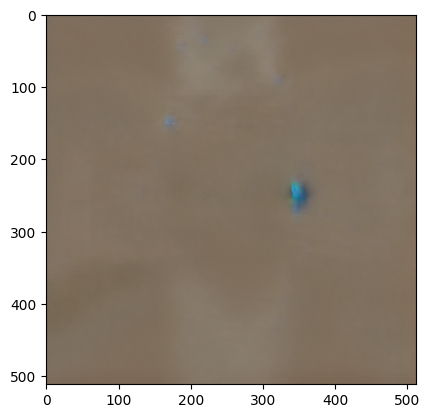

In [5]:
plt.imshow(output_image)